In [16]:
from pathlib import Path
from PIL import Image
from IPython.display import display
import json
import matplotlib.pyplot as plt
from preprocess_dataset import process_data
import pandas as pd

In [25]:
def plot_histogram(df: pd.DataFrame, name: str, ascending: bool = False):
    name_counts = df['DisplayName'].value_counts()
    name_counts = name_counts.sort_values(ascending=ascending).head(20)
    
    plt.figure(figsize=(10, 6))
    plt.bar(name_counts.index, name_counts.values)
    plt.xlabel('Name')
    plt.ylabel('Occurrences')
    plt.title(f'Distribution of {name}')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

def load_images_and_json(folder_path):
    images = []
    json_data = []

    files = [f for f in folder_path.iterdir() if f.is_file()]

    for file_path in files:
        if file_path.suffix == ".jpg":
            image = load_image(file_path)
            images.append(image)

            json_filename = file_path.stem + ".json"
            json_path = folder_path / json_filename
            if json_path.exists():
                with open(json_path, "r") as f:
                    json_data.append(json.load(f))
            else:
                json_data.append(None)

    return images, json_data

def load_image(path):
    image_f = Image.open(path)
    image = image_f.copy()
    image_f.close()
    return image

## First check out the label distribution (only show top 20)

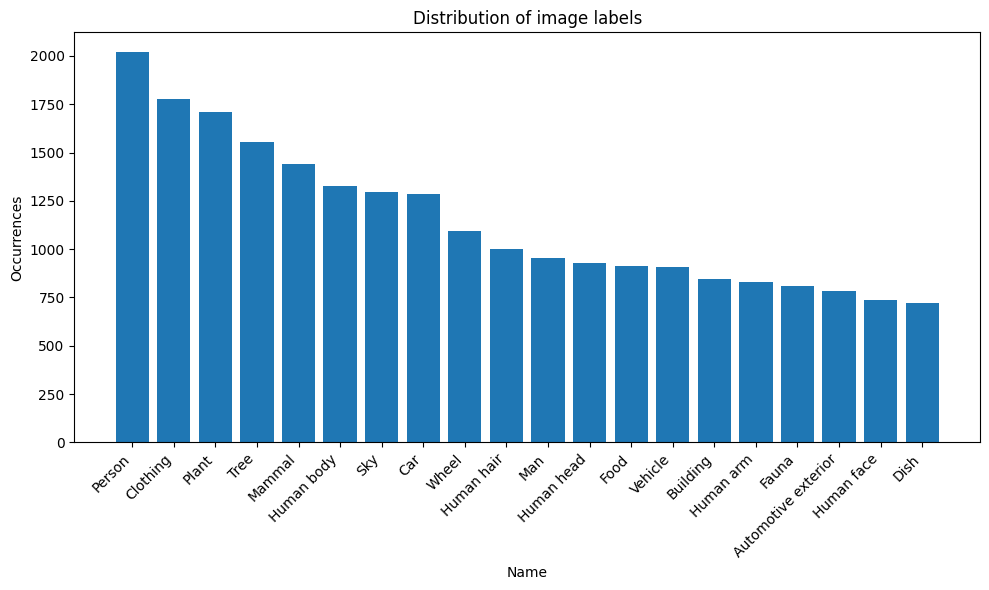

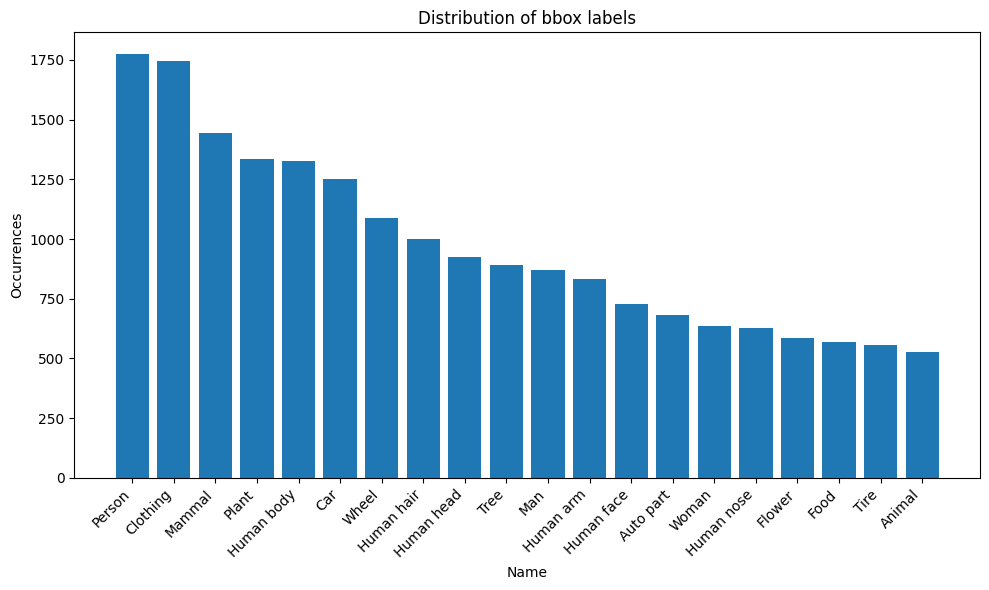

In [26]:
image_labels_10000 = process_data(
    'test-images-with-rotation.csv',
    'oidv7-test-annotations-human-imagelabels.csv',
    'oidv7-class-descriptions.csv',
    nrows=10000,
)
bbox_labels_10000 = process_data(
    'test-images-with-rotation.csv',
    'test-annotations-human-imagelabels-boxable.csv',
    'oidv7-class-descriptions-boxable.csv',
    nrows=10000,
)

plot_histogram(image_labels_10000, name="image labels")
plot_histogram(bbox_labels_10000, name="bbox labels")

## Also check some rare classes (20 as well)

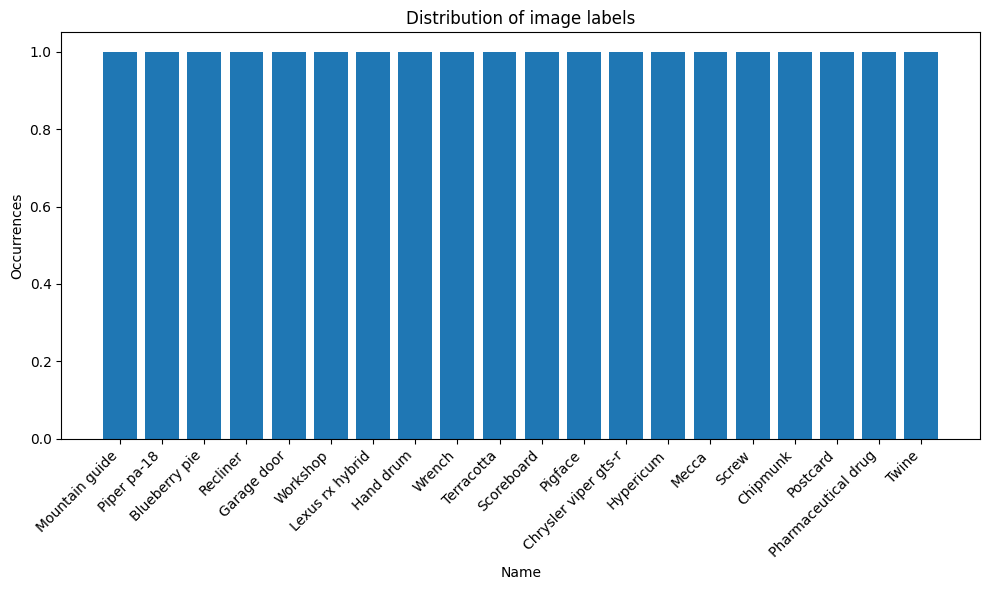

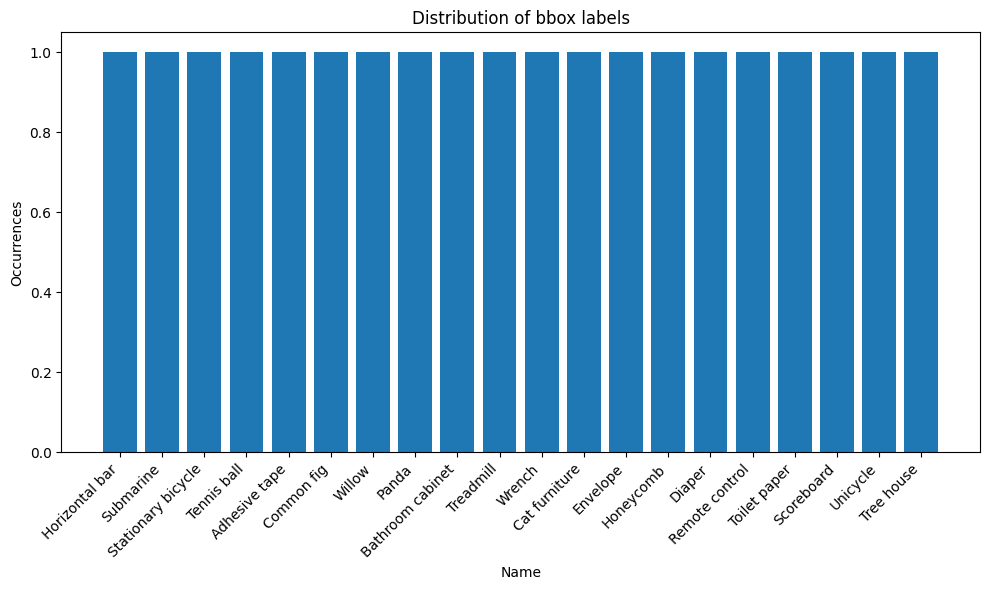

In [27]:
plot_histogram(image_labels_10000, name="image labels", ascending=True)
plot_histogram(bbox_labels_10000, name="bbox labels", ascending=True)

In [28]:
folder_path = Path("./open_images_new/00000/")
images, json_data = load_images_and_json(folder_path=folder_path)
len(images), len(json_data)

(7768, 7768)

Image-level labels: ['Person', 'Roller skating', 'Human body', 'Roller skates', 'Roller derby', 'Mammal', 'Sports equipment', 'Road', 'Sports', 'Shoe', 'Clothing', 'Footwear', 'Roller sport', 'Skating']
Bounding-box labels: ['Footwear', 'Clothing', 'Person', 'Mammal', 'Sports equipment', 'Roller skates', 'Human body']


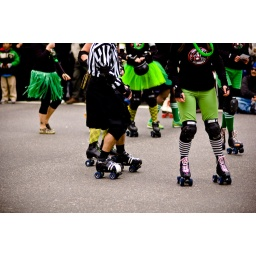

Image-level labels: ['Rock', 'Reef', 'Underwater', 'Natural environment', 'Stony coral', 'Marine biology', 'Ocean', 'Coral reef fish', 'Water', 'Fish', 'Coral', 'Animal', 'Coral reef']
Bounding-box labels: ['Fish', 'Animal']


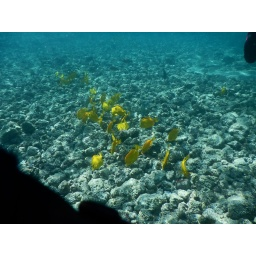

Image-level labels: ['Sled dog', 'Jämthund', 'Native american indian dog', 'Saarlooswolfdog', 'Wolfdog', 'Greenland dog', 'Tamaskan dog', 'East siberian laika', 'Siberian husky', 'Alaskan klee kai', 'Miniature siberian husky', 'Dog', 'West siberian laika', 'Dog breed']
Bounding-box labels: ['Dog']


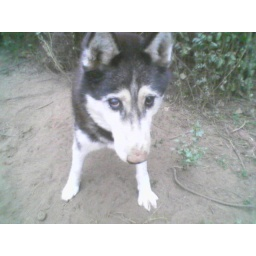

Image-level labels: ['Motor vehicle', 'Ambulance', 'Emergency service', 'Fire apparatus', 'Land vehicle', 'Emergency', 'Emergency vehicle', 'Fire department', 'Road', 'Trailer truck', 'Transport', 'Truck', 'Vehicle', 'Wheel', 'Auto part', 'Commercial vehicle', 'Van', 'Car']
Bounding-box labels: ['Wheel', 'Van', 'Truck', 'Auto part', 'Ambulance', 'Land vehicle', 'Car']


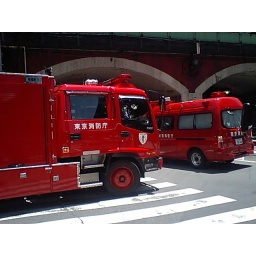

Image-level labels: ['Caffeine', 'Latte', 'Drink', 'Caffè macchiato', 'Hot chocolate', 'Coffee cup', 'Coffee (drink)', 'Café au lait', 'Coffee milk', 'Mocaccino', 'Cup', 'Flat white', 'Cappuccino']
Bounding-box labels: ['Coffee (drink)', 'Coffee cup', 'Drink']


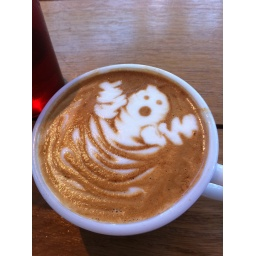

Image-level labels: ['Bathroom', 'Tap', 'Plumbing fixture', 'Bathtub', 'Room', 'White', 'Wall', 'Textile', 'Bathroom accessory']
Bounding-box labels: ['Plumbing fixture', 'Bathtub', 'Tap', 'Bathroom accessory']


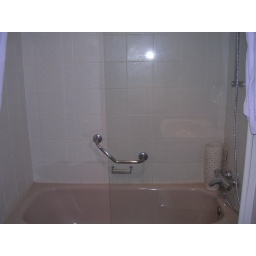

Image-level labels: ['Sky', 'Grassland', 'Pasture', 'Meadow', 'Fauna', 'Grazing', 'Mammal', 'Plain', 'Tree', 'Grass', 'Antelope', 'Grass family', 'Prairie', 'Animal', 'Bovine']
Bounding-box labels: ['Animal', 'Antelope', 'Tree', 'Mammal']


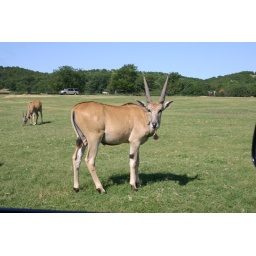

Image-level labels: ['Drink', 'Trophy']
Bounding-box labels: ['Drink']


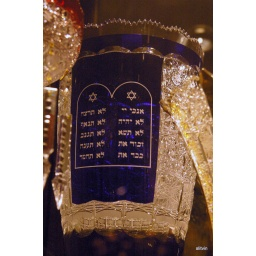

Image-level labels: ['Rice ball', 'Person', 'Asian food', 'Snack', 'Cuisine', 'Electronics', 'Dish', 'Sushi', 'White', 'Human hand']
Bounding-box labels: ['Snack', 'Human hand', 'Sushi']


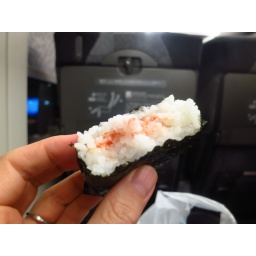

Image-level labels: ['Organ (Biology)', 'Illustration', 'Poster', 'Design', 'Reptile', 'Fractal art', 'Serpent', 'Pattern', 'Art']
Bounding-box labels: ['Poster']


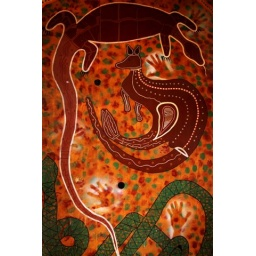

In [30]:
for image, j in zip(images[:10], json_data[:10]):
    print(f"Image-level labels: {j['image_labels']}")
    print(f"Bounding-box labels: {j['bbox_labels']}")
    display(image)